<a href="https://colab.research.google.com/github/Aliksm-DataScientist/House_Pricing/blob/main/House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
import pickle
import json

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/bengaluru_house_prices.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
updatedData = data.drop(['area_type','society','balcony','availability'], axis='columns')

In [ ]:
updatedData.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [ ]:
updated_1 = updatedData.dropna()

In [ ]:
updated_1.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [ ]:
updated_1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
updated_1['bhk'] = updated_1['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-123-922e43eb8776>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_1['bhk'] = updated_1['size'].apply(lambda x: int(x.split(' ')[0]))


In [ ]:
updated_1['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
len(updated_1[updated_1['bhk'] > 10])

12

In [ ]:
updated_1[updated_1.bhk<10]

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [ ]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [ ]:
updated_1[updated_1['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [ ]:
def convert_sqft_to_sum(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [ ]:
updated_2 = updated_1.copy()

In [ ]:
updated_2['total_sqft'] = updated_2['total_sqft'].apply(convert_sqft_to_sum)

In [ ]:
updated_2['price_per_sqft'] = updated_2['price'] * 100000/updated_2['total_sqft']

In [ ]:
updated_2['location'] = updated_2['location'].apply(lambda x : x.strip())

In [ ]:
locations = updated_2.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [ ]:
locations_less_than_10 = locations[locations<=10]

In [ ]:
updated_2['location'] = updated_2['location'].apply(lambda x: 'other' if x in locations_less_than_10 else x)

In [ ]:
updated_2['location'].head(20)

,location
0,Electronic City Phase II
1,Chikka Tirupathi
2,Uttarahalli
3,Lingadheeranahalli
4,Kothanur
5,Whitefield
6,Old Airport Road
7,Rajaji Nagar
8,Marathahalli
9,other


In [ ]:
updated_3 =  updated_2[~(updated_2.total_sqft/updated_2.bhk<300)]

In [ ]:
def removeOutliersOfPricePerSqt(dataSet):
    df_out = pd.DataFrame()
    for key, subdf in dataSet.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [ ]:
afterRemovingOutLiersFromPricePerSqt = removeOutliersOfPricePerSqt(updated_3)

In [ ]:
def removeOutliersOfBHK(dataSet):
    exclude_indices = np.array([])
    for location, location_df in dataSet.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return dataSet.drop(exclude_indices,axis='index')

updated_4 = removeOutliersOfBHK(afterRemovingOutLiersFromPricePerSqt)

Text(0, 0.5, 'Count')

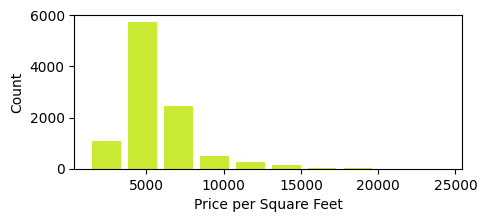

In [ ]:
plt.hist(afterRemovingOutLiersFromPricePerSqt.price_per_sqft, rwidth=0.8, color='#c9eb34')
plt.xlabel('Price per Square Feet')
plt.ylabel('Count')

In [ ]:
def plot_scatter_chart(dataSet,location):
    bhk2 = dataSet[(dataSet.location==location) & (dataSet.bhk==2)]
    bhk3 = dataSet[(dataSet.location==location) & (dataSet.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (5, 2)
    plt.scatter(bhk2.total_sqft, bhk2.price,color='red', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker='*',color='black', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()

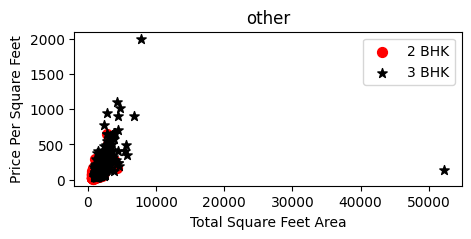

In [ ]:
plot_scatter_chart(updated_3, 'other')

In [ ]:
updated_5 = updated_4[updated_4.bath < updated_4.bhk + 2]

In [ ]:
updated_6 = updated_5.drop(['size',"price_per_sqft"],axis='columns')

In [ ]:
dummies = pd.get_dummies(updated_6.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
updated_7 = pd.concat([updated_6, dummies.drop('other', axis='columns')], axis='columns')

In [ ]:
updated_8 = updated_7.drop('location', axis='columns')

In [ ]:
X = updated_8.drop('price', axis='columns')
X.tail(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
10236,1353.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10237,812.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10240,3600.0,5.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y = updated_8['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(5800, 244)

In [ ]:
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr_clf.score(X_test, y_test)

0.8746160116849716

In [ ]:
data.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [ ]:
X_train.head(2)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1025,1200.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3482,1995.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X_train.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [ ]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [ ]:
print(predict_price('1st Phase JP Nagar', 1000, 2, 3).round(3),'Lakhs')

90.228 Lakhs


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
